In [1]:
#########################################
# Test functions and non-permanent code #
# Author: Jarrett Reimers               #

# Keep as a reference, do not edit      #
#########################################

import pandas as pd
import os
import datetime

import query
from stations import Stations

from matplotlib import pyplot
import seaborn as sns

In [2]:
data = pd.read_csv("data/2015/5/1.csv")

In [3]:
start_times = []
for start_time in data['starttime']:
  start_times.append(datetime.datetime.strptime(start_time, "%m/%d/%Y %H:%M:%S"))
data['starttime'] = start_times
stop_times = []
for stop_time in data['stoptime']:
  stop_times.append(datetime.datetime.strptime(stop_time, "%m/%d/%Y %H:%M:%S"))
data['stoptime'] = stop_times

data

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,2015-05-01 00:00:11,2015-05-01 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,2015-05-01 00:00:28,2015-05-01 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,2015-05-01 00:00:52,2015-05-01 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,2015-05-01 00:00:48,2015-05-01 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,2015-05-01 00:00:51,2015-05-01 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961981,541,2015-05-31 23:57:10,2015-06-01 00:06:12,536,1 Ave & E 30 St,40.741444,-73.975361,285,Broadway & E 14 St,40.734546,-73.990741,20118,Subscriber,1978.0,1
961982,2147,2015-05-31 23:58:48,2015-06-01 00:34:36,225,W 14 St & The High Line,40.741951,-74.008030,2022,E 59 St & Sutton Pl,40.758491,-73.959206,17819,Subscriber,1959.0,1
961983,572,2015-05-31 23:58:55,2015-06-01 00:08:27,157,Henry St & Atlantic Ave,40.690893,-73.996123,407,Henry St & Poplar St,40.700469,-73.991454,17801,Subscriber,1964.0,1
961984,380,2015-05-31 23:59:43,2015-06-01 00:06:04,265,Stanton St & Chrystie St,40.722293,-73.991475,297,E 15 St & 3 Ave,40.734232,-73.986923,21099,Subscriber,1985.0,1


In [4]:
station_list = query.get_stations(data)
station_id = 324 

station_data = query.select_start_station(data, station_id)
stations = Stations()
start_time = query.get_datetime(2015, 5, 1, 0, 0, 0)

freq = []
for day in range(0, 31):
  stations.clear_data()
  window = datetime.timedelta(days=1)
  end_time = start_time + window
  window_data = query.select_time(station_data, start_time, end_time)
  stations.add_data(window_data)

  print("Total trips started on day", day)
  if station_id in stations.stations_count:
    print(stations.stations_count[station_id])
  else:
    print(0)
  
  daily = []
  for hour in range(0, 24):
    stations.clear_data()
    window = datetime.timedelta(hours=1)
    end_time = start_time + window
    window_data = query.select_time(station_data, start_time, end_time)
    stations.add_data(window_data)

    if station_id in stations.stations_count:
      print(hour, stations.stations_count[station_id])
      daily.append(stations.stations_count[station_id])
    else:
      print(hour, 0)
      daily.append(0)
      
    start_time = end_time
  freq.append(daily)
  start_time = end_time


Total trips started on day 0
-35
0 -1
1 0
2 0
3 0
4 0
5 0
6 0
7 -3
8 -1
9 -2
10 -3
11 -2
12 -3
13 -1
14 -1
15 -4
16 -1
17 -2
18 -6
19 -3
20 0
21 -1
22 -1
23 0
Total trips started on day 1
-27
0 0
1 -1
2 -1
3 -1
4 -1
5 0
6 0
7 0
8 -2
9 -2
10 -1
11 -1
12 0
13 -1
14 0
15 -2
16 0
17 -1
18 -1
19 -4
20 -4
21 -3
22 0
23 -1
Total trips started on day 2
-34
0 0
1 -3
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 -3
10 -4
11 0
12 -2
13 -2
14 -3
15 -1
16 -3
17 -3
18 -2
19 -4
20 -1
21 -2
22 -1
23 0
Total trips started on day 3
-57
0 -1
1 0
2 0
3 0
4 0
5 0
6 -1
7 -5
8 -2
9 -4
10 0
11 -2
12 -1
13 -2
14 -2
15 -2
16 -1
17 -4
18 -14
19 -7
20 -3
21 -3
22 -1
23 -2
Total trips started on day 4
-68
0 -1
1 0
2 0
3 0
4 0
5 0
6 -1
7 -1
8 -2
9 -1
10 0
11 0
12 0
13 -6
14 -5
15 0
16 -5
17 -10
18 -8
19 -13
20 -3
21 -5
22 -4
23 -3
Total trips started on day 5
-62
0 -2
1 -1
2 0
3 -1
4 0
5 0
6 0
7 -3
8 -2
9 0
10 -3
11 0
12 -1
13 -1
14 -3
15 -2
16 -2
17 -6
18 -11
19 -7
20 -6
21 -4
22 -4
23 -3
Total trips started on day 6
-66
0 -1
1 -

<Axes: >

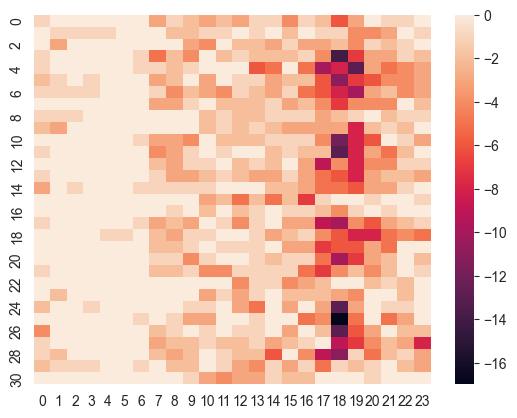

In [5]:
sns.heatmap(freq)

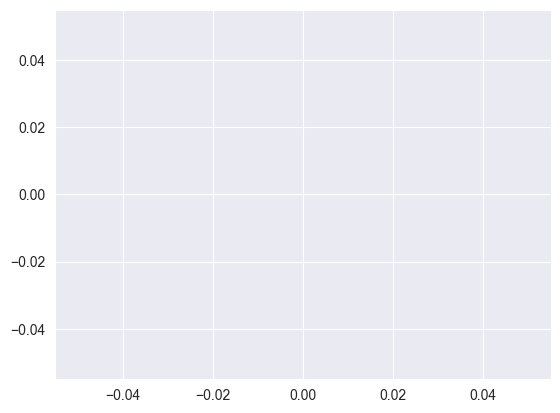

In [6]:
stations = Stations()
stations.add_data(query.select_time(data, start_time, end_time))
  
pyplot.plot(range(len(stations.stations_count)), stations.stations_count.values())

In [7]:
maximum = 0
max_station = 0
for station in stations.stations_count:
  if stations.stations_count[station] > maximum:
    max_station = station
    maximum = stations.stations_count[station]
print("The maximum is at station:", max_station, ". With", maximum, "bikes at end of period")

The maximum is at station: 0 . With 0 bikes at end of period


In [17]:
minimum = 0
min_station = 0
for station in stations.stations_count:
  if stations.stations_count[station] < minimum:
    min_station = station
    minimum = stations.stations_count[station]
print("The minimum is at station:", min_station, ". With", minimum, "bikes at end of period")

The minimum is at station: 496 . With -69 bikes at end of period
